In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
from sklearn.metrics import classification_report
filename = 'bbc-text.csv'
data = pandas.read_csv(filename)
print(data.shape)
Y=data.category
X=data.text
Xtrain=np.array(X[0:1780])
Ytrain=np.array(Y[0:1780])
Xtest=np.array(X[1780:2225])
Ytest=np.array(Y[1780:2225])

(2225, 2)


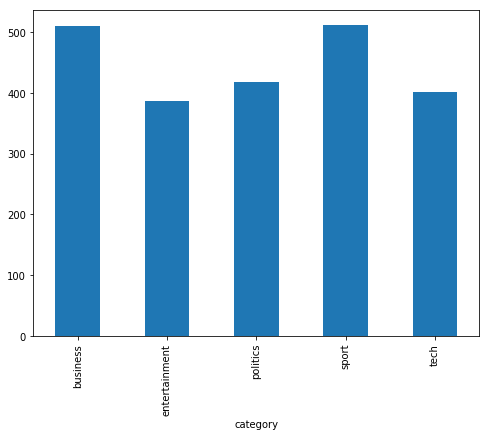

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
data.groupby('category').text.count().plot.bar(ylim=0)
plt.show()

In [3]:
#The classifiers and learning algorithms can not directly process the text documents in their original form, as most of them
#expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.
#Therefore, during the preprocessing step, the texts are converted to a more manageable representation.

#One common approach for extracting features from text is to use the bag of words model: a model where for each document, 
#a complaint narrative in our case, the presence (and often the frequency) of words is taken into consideration, 
#but the order in which they occur is ignored.

#Specifically, for each term in our dataset, we will calculate a measure called Term Frequency, 
#Inverse Document Frequency, abbreviated to tf-idf. We will use sklearn.feature_extraction.text.TfidfVectorizer 
#to calculate a tf-idf vector for each of consumer complaint narratives:

# --> sublinear_df is set to True to use a logarithmic form for frequency.
# --> min_df is the minimum numbers of documents a word must be present in to be kept.
# --> norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
# --> ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
# --> stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(data.text).toarray()
labels = data.category
features.shape

#Now, each of 2225 text sample is represented by 14415 features, 
#representing the tf-idf score for different unigrams and bigrams

(2225, 14415)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(Xtrain)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, Ytrain)

In [6]:
y=(clf.predict(count_vect.transform(Xtest)))
print(classification_report(Ytest, y))

  (0, 1)	1
  (0, 176)	1
  (0, 209)	1
  (0, 429)	1
  (0, 800)	1
  (0, 1956)	1
  (0, 1983)	1
  (0, 2036)	1
  (0, 2196)	2
  (0, 2491)	1
  (0, 2794)	1
  (0, 2845)	1
  (0, 2932)	1
  (0, 3222)	1
  (0, 3297)	3
  (0, 3383)	3
  (0, 3544)	1
  (0, 3568)	1
  (0, 3923)	1
  (0, 3938)	2
  (0, 4504)	1
  (0, 4535)	1
  (0, 4865)	1
  (0, 5349)	1
  (0, 5389)	1
  :	:
  (444, 24326)	1
  (444, 24346)	1
  (444, 24358)	3
  (444, 24375)	1
  (444, 24558)	3
  (444, 24914)	1
  (444, 25150)	2
  (444, 25415)	1
  (444, 25633)	2
  (444, 25837)	1
  (444, 25881)	1
  (444, 26150)	2
  (444, 26201)	3
  (444, 26256)	1
  (444, 26344)	2
  (444, 26361)	1
  (444, 26452)	1
  (444, 26468)	1
  (444, 26529)	1
  (444, 26562)	1
  (444, 26599)	1
  (444, 26610)	1
  (444, 26742)	2
  (444, 26878)	2
  (444, 26921)	1
               precision    recall  f1-score   support

     business       0.92      0.96      0.94       106
entertainment       1.00      0.65      0.79        66
     politics       0.88      0.98      0.93        86
     

In [8]:
#Training model
X_train_counts1 = count_vect.fit_transform(X)
X_train_tfidf1 = tfidf_transformer.fit_transform(X_train_counts1)
mnb= MultinomialNB().fit(X_train_tfidf1, Y)

In [10]:
import pickle
#allows to serialize python object into a file
with open('mnb1_textclassification_pickle','wb') as f:
    pickle.dump(mnb,f)
with open('count_textclassification_pickle','wb') as f1:
    pickle.dump(count_vect,f1)